In [1]:
import requests
# AAPL是拼多多公司的股票代码
stock_code = "PDD"
# 构造完整的获取股票历史信息的网页URL
url = 'https://finance.yahoo.com/quote/%s/history?p=%s' % (stock_code, stock_code)
# 获取上述URL对应的网页
r = requests.get(url)
print(r)

<Response [200]>


In [2]:
import re
# 定义正则表达式，找到所有我们需要的股票历史数据
result = re.findall('"HistoricalPriceStore":{"prices":(.*?),"isPending"', r.text)
# 如果没有找到数据，prices就是None
if result is not None:
    print(result)

['[{"date":1610721000,"open":162.9499969482422,"high":164.72999572753906,"low":157.8000030517578,"close":161.1999969482422,"volume":7218200,"adjclose":161.1999969482422},{"date":1610634600,"open":170.60000610351562,"high":172.35000610351562,"low":164.38999938964844,"close":167.25999450683594,"volume":6321200,"adjclose":167.25999450683594},{"date":1610548200,"open":173.2100067138672,"high":173.2100067138672,"low":160.17999267578125,"close":164.8000030517578,"volume":10894500,"adjclose":164.8000030517578},{"date":1610461800,"open":169.4600067138672,"high":172.83999633789062,"low":168,"close":169.47999572753906,"volume":5957900,"adjclose":169.47999572753906},{"date":1610375400,"open":170.94000244140625,"high":174.88999938964844,"low":162.2100067138672,"close":172.49000549316406,"volume":9355200,"adjclose":172.49000549316406},{"date":1610116200,"open":182.6999969482422,"high":186.6699981689453,"low":174.3699951171875,"close":180.77000427246094,"volume":8814800,"adjclose":180.77000427246094

In [3]:
# 把需要的股票价格从查找的结果中提取出来
prices = eval(result[0])
prices[1]

{'date': 1610634600,
 'open': 170.60000610351562,
 'high': 172.35000610351562,
 'low': 164.38999938964844,
 'close': 167.25999450683594,
 'volume': 6321200,
 'adjclose': 167.25999450683594}

In [4]:
# 通过肉眼观察，我们可以看到上述结果中有一些比较奇怪的数据，需要进行数据清洗
quotes = [item for item in prices if not 'type' in item]
quotes[1]

{'date': 1610634600,
 'open': 170.60000610351562,
 'high': 172.35000610351562,
 'low': 164.38999938964844,
 'close': 167.25999450683594,
 'volume': 6321200,
 'adjclose': 167.25999450683594}

In [5]:
from datetime import date
# 同时，需要将数据中date字段中的时间戳转换成更加直观的日期格式
list1 = []
for i in range(len(quotes)):
    x = date.fromtimestamp(quotes[i]['date'])
    y = date.strftime(x,'%Y-%m-%d')
    list1.append(y)
list1[1]

'2021-01-14'

In [ ]:
import pandas as pd
# 使用pandas模块提供的DataFrame对象存储股票数据，并将刚才的日期作为索引列的值
quotesdf_ori = pd.DataFrame(quotes, index = list1)
quotesdf_ori

In [16]:
import time
# 去掉原始数据中的时间戳数据，并按照月份进行分组
quotesdf = quotesdf_ori.drop(['date'], axis = 1)  # axis=1表示从某列中删除，axis=0表示从某行中删除
templist = []
for i in range(len(quotesdf)):
    temp = time.strptime(quotesdf.index[i],"%Y-%m-%d") # strptime()函数根据指定的格式把一个时间字符串解析为时间对象
    templist.append("{}/{:02}".format(temp.tm_year%100,temp.tm_mon))  # "{:02}"表示将月份改成2位且带前导0的格式
tempdf = quotesdf.copy()
tempdf['month'] = templist
tempdf

,open,high,low,close,volume,adjclose,month
2021-01-15,162.949997,164.729996,157.800003,161.199997,7218200,161.199997,21/01
2021-01-14,170.600006,172.350006,164.389999,167.259995,6321200,167.259995,21/01
2021-01-13,173.210007,173.210007,160.179993,164.800003,10894500,164.800003,21/01
2021-01-12,169.460007,172.839996,168.000000,169.479996,5957900,169.479996,21/01
2021-01-11,170.940002,174.889999,162.210007,172.490005,9355200,172.490005,21/01
...,...,...,...,...,...,...,...
2020-01-23,38.250000,38.650002,37.639999,38.369999,5169400,38.369999,20/01
2020-01-22,39.950001,40.740002,38.669998,38.790001,4776900,38.790001,20/01
2020-01-21,38.580002,39.639999,38.290001,39.340000,4992200,39.340000,20/01
2020-01-17,39.840000,40.459999,39.189999,39.430000,4863900,39.430000,20/01


In [17]:
# 通过对月份数据进行分组操作，求出苹果公司近一年来，每个月的平均收盘价
avgPrices = tempdf.groupby('month').close.mean()
avgPrices

month
20/01     37.656364
20/02     35.601052
20/03     35.200908
20/04     44.493333
20/05     58.035000
20/06     77.052727
20/07     85.790455
20/08     90.027618
20/09     81.335238
20/10     83.042273
20/11    126.256500
20/12    150.025454
21/01    172.684999
Name: close, dtype: float64

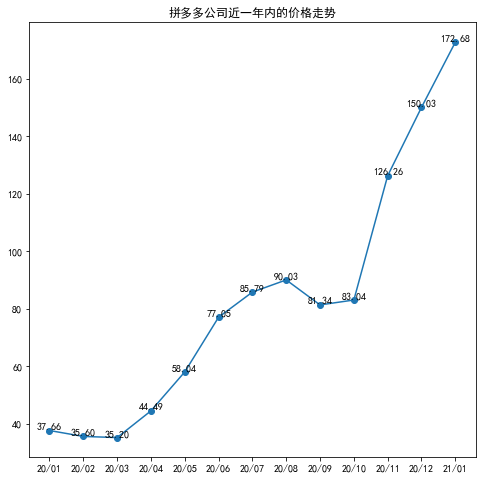

In [19]:
import matplotlib.pyplot as plt
# 将上述数据表示成折线图
x = list(avgPrices.index)
y = avgPrices.values
plt.figure(figsize=(8,8))
plt.plot(x, y,"-o")
# 在图表中加入中文标题的问题
# from matplotlib.font_manager import FontProperties
# myfont = FontProperties(fname=r"//System//Library//Fonts//STHeiti Medium.ttc", size=16)
# plt.title("拼多多公司近一年内的价格走势")
# # 为每一个点加上数据标签
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.title('拼多多公司近一年内的价格走势')
for a,b in zip(x,y):
    plt.text(a,b,"%.2f"%b,ha='center',va='bottom')
plt.show()